Face Detection Using Deep Neural Network(DNN).

In [ ]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/d1f0zadon1ffpue/AADTRTxWKD501zizH6vaaTORa?dl=1 -O code.zip -q --show-progress
    !unzip -qq code.zip
    !pip install --upgrade opencv-contrib-python
else:
    pass

code.zip            100%[===================>]  38.57M  47.9MB/s    in 0.8s    
mapname:  conversion of  failed
     |████████████████████████████████| 66.7 MB 32 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Global Constants

In [ ]:
# Colors.
blue = (255, 0, 0)
green = (0, 255, 0)
red = (0, 0, 255)
yellow = (0, 255, 255)
cyan = (255, 0, 255)

## 1 Load Images

Let us first load a few images and display them

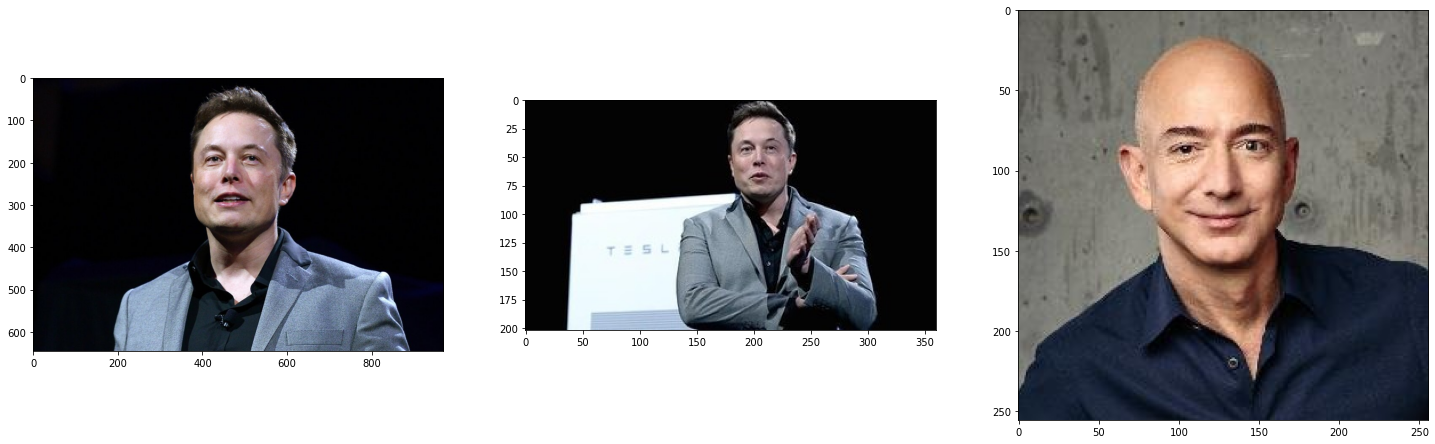

In [ ]:
# Load images for comparison.
img1 = cv2.imread("musk1.jpg")
img2 = cv2.imread("musk2.jpg")
img3 = cv2.imread("jeff1.jpg")

plt.figure(figsize=(25,10))
plt.subplot(131); plt.imshow(img1[...,::-1]);
plt.subplot(132); plt.imshow(img2[...,::-1]);
plt.subplot(133); plt.imshow(img3[...,::-1]);

## 2 Face Detection
We will create a face detector object and then call the detect method for finding the faces. This face detector also returns a 5 point facial landmarks along with the bounding box of faces.

### 2.1 Create Face Detector Object
```
retval = cv2.FaceDetectorYN.create(model, config, input_size, score_threshold, nms_threshold, top_k, backend_id, target_id)
```
Where,

- `retval` is the flag for succeful operation

The detector has **three required parameters**.
 - `model` : Path to the model file
 - `config` : Not required for ONNX model. Added for compatibility.
 - `input_size` : The input size of the image accpted by the network.

[Link to Documentation](https://docs.opencv.org/4.x/df/d20/classcv_1_1FaceDetectorYN.html#a42293cf2d64f8b69a707ab70d11925b3)


In [ ]:
# Model paths.
face_detection_model = 'face_detection_yunet_2021dec.onnx'
face_recognition_model = 'face_recognition_sface_2021dec.onnx'

# Detector.
detector = cv2.FaceDetectorYN.create(face_detection_model, "", (320, 320))

### 2.2 Detect faces and corresponding 5 landmark points
```
retval, faces = cv2.FaceDetectorYN.detect(image)
```
Where,
- `retval` is the flag for succeful operation
- `faces` is an array containing the bounding box location of each detected face.

Each face array contains 15 elements:
- The first 4 elements correspond to the (x,y,w,h)
- The next 10 elements are the (x,y) locations of the 5 landmarks
- The last element is the confidence score

[Link to Documentation](https://docs.opencv.org/4.x/df/d20/classcv_1_1FaceDetectorYN.html#ac05bd075ca3e6edc0e328927aae6f45b)

In [ ]:
# Image size.
img_height, img_width = img1.shape[:2]
# Set detector input size.
detector.setInputSize((img_width, img_height))
# Perform detection.
retval, faces = detector.detect(img1)

print(faces)

[[369.89722  98.30162 225.39175 257.74884 425.77182 190.2844  524.97296
  194.86313 463.4129  246.4247  424.43988 282.80283 514.17896 286.89056
    1.     ]]


### 2.3 Display Detections
This functions renders bounding box and five landmarks on the detected face.

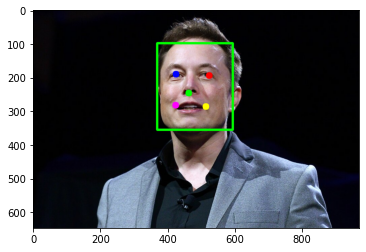

In [ ]:
def display_detections(img, faces, radius=10, thickness=5):
    im = img.copy()
    if faces is not None:
        for idx, face in enumerate(faces):
            coords = face[:-1].astype(np.int32)
            tlc = (coords[0], coords[1])
            brc = (coords[0]+coords[2], coords[1]+coords[3])
            cv2.rectangle(im, tlc, brc, green, thickness)
            cv2.circle(im, (coords[4], coords[5]), radius, blue, -1)
            cv2.circle(im, (coords[6], coords[7]), radius, red, -1)
            cv2.circle(im, (coords[8], coords[9]), radius, green, -1)
            cv2.circle(im, (coords[10], coords[11]), radius, cyan, -1)
            cv2.circle(im, (coords[12], coords[13]), radius, yellow, -1)
    plt.imshow(im[:,:,::-1])

display_detections(img1, faces)